# Initialization

In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=d7547120fd37f887180180b7b92bf9ac527612f48fc9bb799571214f27ca57e7
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [2]:
import sqlite3
import pandas as pd
import pandasql as ps
import numpy as np
import datetime
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('bread basket.csv')

In [4]:
data.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

# Data Exploration and Insights

## Most and Least Sold Items in General

### Code

In [5]:
most_sold_items = '''select Item, count(Item) as Sold
              from
                data
              group by
                Item
              order by
                count(Item) desc limit 4
              '''
most_sold_items_data = ps.sqldf(most_sold_items)

other_items = '''select count(Item) as Sold
              from
                data
              where
                Item not in ('Bread','Coffee', 'Tea', 'Cake')
              '''

other_items_data = ps.sqldf(other_items)

others_row = {'Item': 'Others', 'Sold': other_items_data.iloc[0,0]}

most_sold_items_data.loc[len(most_sold_items_data)] = others_row

least_sold_items = '''select Item, count(Item) as Sold
              from
                data
              group by
                Item
              order by
                count(Item) asc limit 10
              '''

least_sold_items_data = ps.sqldf(least_sold_items)

In [6]:
def pizza_graph(x,labels):

  fig1, ax1 = plt.subplots(figsize=(7,7))

  explode = (0.1, 0.1, 0, 0, 0)

  ax1.pie(x, explode = explode, labels = labels, autopct = '%1.1f%%',
          shadow='True', startangle=90)

  ax1.axis('equal')

  ax1.set_title('Percentage of Items Sold', weight = 'bold',size = 16)

  plt.show()

### Graph and Data

In [7]:
least_sold_items_data

,Item,Sold
0,Adjustment,1
1,Bacon,1
2,Chicken sand,1
3,Gift voucher,1
4,Olum & polenta,1
5,Polenta,1
6,Raw bars,1
7,The BART,1
8,Bowl Nic Pitt,2
9,Chimichurri Oil,2


In [8]:
most_sold_items_data.head()

,Item,Sold
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Others,9251


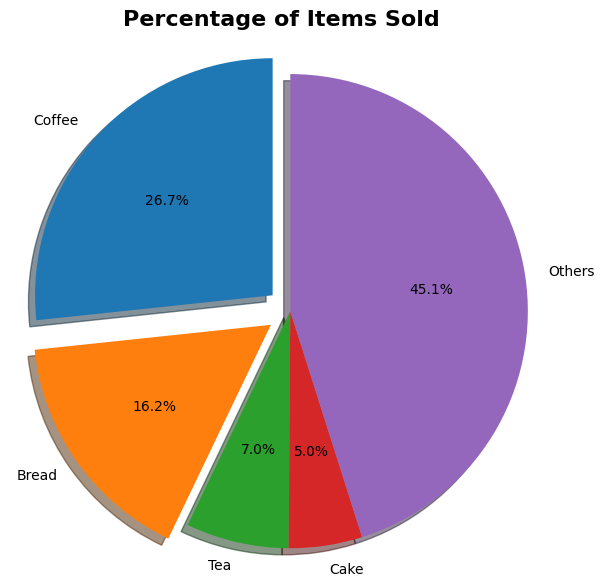

In [9]:
pizza_graph(most_sold_items_data['Sold'], most_sold_items_data['Item'])

### Insights

- There are plenty of products that sold less than 10 units over the entire time the data was collected, these products can probably be removed from the menu since they're occupying spaces where other more profitable products could ocuppy, such as Cake or Bread

- The most sold products are Coffe and Bread from a large margin, therefore these could recieve some investiments such as offering new types of Coffe and Bread or even improve the recipes of each one to make them better in order to try to rise the volume of sales of these items

- Since Coffe and Bread are the most attractive items in the shop, some conected interests could be offered too. Like offering books to be read while taking coffe.

## Day Period Analisys

### Code

In [10]:
graph_period_day = '''select period_day as 'Day Period', count(period_day) as 'Number of Sales'
              from
                data
              group by
                period_day
              order by
                count(period_day) desc limit 2
              '''

graph_period_day_data = ps.sqldf(graph_period_day)

other_period = '''select count(period_day) as Sold
              from
                data
              where
                period_day not in ('afternoon','morning')
              '''

other_period_data = ps.sqldf(other_period)

others_period_row = {'Day Period': 'Others', 'Number of Sales': other_period_data.iloc[0,0]}

graph_period_day_data.loc[len(graph_period_day_data)] = others_period_row

period_day = '''select period_day as 'Day Period', count(period_day) as 'Number of Sales'
              from
                data
              group by
                period_day
              order by
                count(period_day) desc
              '''

period_day_data = ps.sqldf(period_day)

In [11]:
weekely = '''select weekday_weekend as 'Week Day', count(weekday_weekend) as 'Number of Sales'
              from
                data
              group by
                weekday_weekend
              order by
                count(weekday_weekend) desc
              '''
weekely_data = ps.sqldf(weekely)

In [12]:
def double_pizza_graph2(x1,labels1,x2,labels2):

  fig1, ax = plt.subplots(1,2, figsize=(15,8))

  ax[0].pie(x1, labels = labels1, autopct = '%1.1f%%', shadow='True', startangle=90)

  ax[0].axis('equal')

  ax[0].set_title('Percentage of Items Sold on Day Period', weight = 'bold',size = 16)

  ax[1].pie(x2, labels = labels2, autopct = '%1.1f%%', shadow='True', startangle=90)

  ax[1].axis('equal')

  ax[1].set_title('Percentage of Items Sold on Week Days', weight = 'bold',size = 16)


  plt.show()

### Graphs and Data

In [13]:
period_day_data.head()

,Day Period,Number of Sales
0,afternoon,11569
1,morning,8404
2,evening,520
3,night,14


In [14]:
weekely_data.head()

,Week Day,Number of Sales
0,weekday,12807
1,weekend,7700


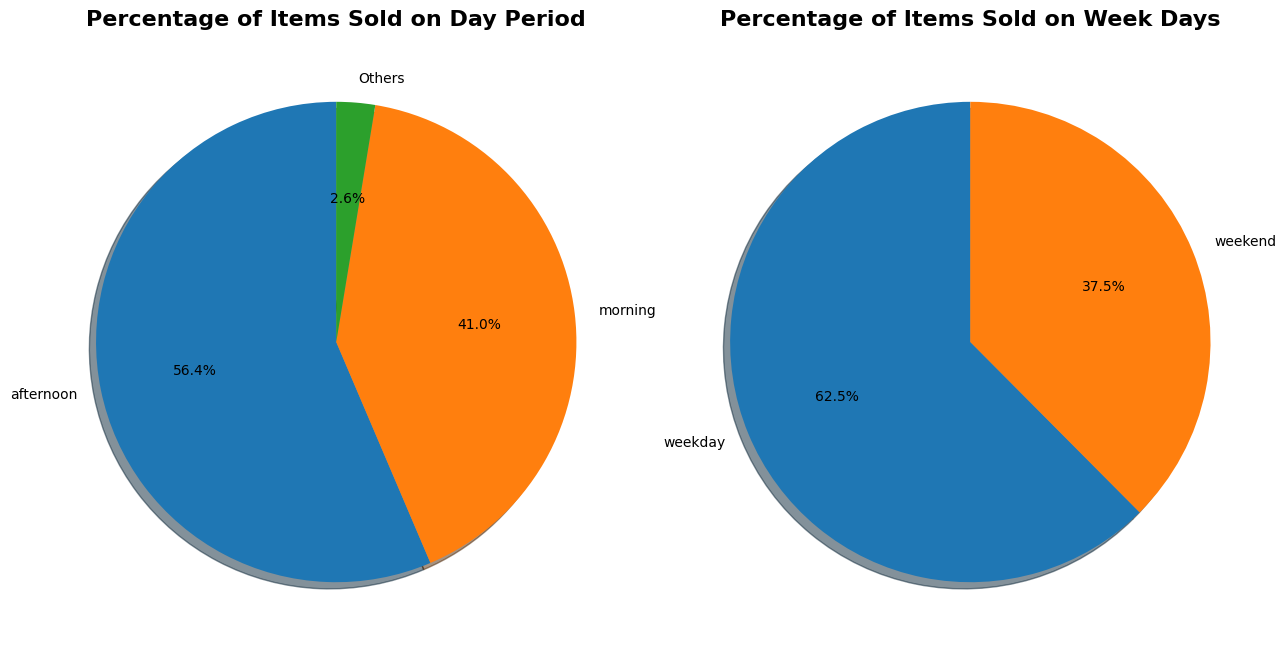

In [15]:
double_pizza_graph2(graph_period_day_data['Number of Sales'],graph_period_day_data['Day Period'],weekely_data['Number of Sales'],weekely_data['Week Day'])

### Insights

- The most profitable periods are, by a large margin, afternoon and morning, respectively. So these should be the periods to pay more attention to.

- Evening and Night times are the least profitable of all. If there are no interests in specifically work at these periods, such as attend an specific public, closing the store could be an alternative to consider in order to save some currency from keeping the shop from working expenses.

- Weekdays are the ones with most sales being made, so if there are any kind of problem where the shop needs to be closed, the weekends are better to lose less potencial sales.

- Since the products need raw material to be made, such as flour for Bread or coffe powder and seeds for the Coffe, there should be a plan for acquiring these materials in order to prepare for higher demand of the weekdays.

## Day Time Analisys

### Code

#### Total Purchases Over Morning

In [16]:
time_period_day_morning = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_data = ps.sqldf(time_period_day_morning)

for numero_linha, texto_linha in enumerate(time_period_day_morning_data['Time']):
  tempo = time_period_day_morning_data['Time'].iloc[numero_linha]
  timestamp = datetime.datetime.strptime(tempo, '%d-%m-%Y %H:%M')
  time_period_day_morning_data['Time'][numero_linha] = timestamp.strftime('2021-01-01 %H:%M')

morning_count = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_data
              group by
                Time
              '''

morning_count_data_1 = ps.sqldf(morning_count)

morning_count_data_2 = pd.to_datetime(morning_count_data_1['Time'])

time_data = []

for numero_linha_time, valor_linha_time in enumerate(morning_count_data_2):
  time_data.append(morning_count_data_2[numero_linha_time])

morning_count_data = pd.DataFrame({'Time': time_data,
                                  'Purchases': morning_count_data_1['Purchases']})

morning_dataframe = morning_count_data.drop([0])

##### From 7:30 to 8:00

In [17]:
time_period_day_morning_730 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_730_data = ps.sqldf(time_period_day_morning_730)

for numero_linha_morning_730, texto_linha_morning_730 in enumerate(time_period_day_morning_730_data['Time']):
  tempo_morning_730 = time_period_day_morning_730_data['Time'].iloc[numero_linha_morning_730]
  timestamp_morning_730 = datetime.datetime.strptime(tempo_morning_730, '%d-%m-%Y %H:%M')
  time_period_day_morning_730_data['Time'][numero_linha_morning_730] = timestamp_morning_730.strftime('2021-01-01 %H:%M')

morning_count_730 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_730_data
              where
                Time >= '2021-01-01 07:30:00' and Time < '2021-01-01 08:00:00'
              '''

morning_count_730_data_1 = ps.sqldf(morning_count_730)

time_data_morning_count_730 = ['07:30 - 08:00']

morning_count_730_data = pd.DataFrame({'Time': time_data_morning_count_730,
                                  'Purchases': morning_count_730_data_1['Purchases']})

morning_730_dataframe = morning_count_730_data

##### From 8:00 to 8:30

In [18]:
time_period_day_morning_800 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_800_data = ps.sqldf(time_period_day_morning_800)

for numero_linha_morning_800, texto_linha_morning_800 in enumerate(time_period_day_morning_800_data['Time']):
  tempo_morning_800 = time_period_day_morning_800_data['Time'].iloc[numero_linha_morning_800]
  timestamp_morning_800 = datetime.datetime.strptime(tempo_morning_800, '%d-%m-%Y %H:%M')
  time_period_day_morning_800_data['Time'][numero_linha_morning_800] = timestamp_morning_800.strftime('2021-01-01 %H:%M')

morning_count_800 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_800_data
              where
                Time >= '2021-01-01 08:00:00' and Time < '2021-01-01 08:30:00'
              '''

morning_count_800_data_1 = ps.sqldf(morning_count_800)

time_data_morning_count_800 = ['08:00 - 08:30']

morning_count_800_data = pd.DataFrame({'Time': time_data_morning_count_800,
                                  'Purchases': morning_count_800_data_1['Purchases']})

morning_800_dataframe = morning_count_800_data

##### From 8:30 to 9:00

In [19]:
time_period_day_morning_830 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_830_data = ps.sqldf(time_period_day_morning_830)

for numero_linha_morning_830, texto_linha_morning_830 in enumerate(time_period_day_morning_830_data['Time']):
  tempo_morning_830 = time_period_day_morning_830_data['Time'].iloc[numero_linha_morning_830]
  timestamp_morning_830 = datetime.datetime.strptime(tempo_morning_830, '%d-%m-%Y %H:%M')
  time_period_day_morning_830_data['Time'][numero_linha_morning_830] = timestamp_morning_830.strftime('2021-01-01 %H:%M')

morning_count_830 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_830_data
              where
                Time >= '2021-01-01 08:30:00' and Time < '2021-01-01 09:00:00'
              '''

morning_count_830_data_1 = ps.sqldf(morning_count_830)

time_data_morning_count_830 = ['08:30 - 09:00']

morning_count_830_data = pd.DataFrame({'Time': time_data_morning_count_830,
                                  'Purchases': morning_count_830_data_1['Purchases']})

morning_830_dataframe = morning_count_830_data

##### From 9:00 to 9:30

In [20]:
time_period_day_morning_900 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_900_data = ps.sqldf(time_period_day_morning_900)

for numero_linha_morning_900, texto_linha_morning_900 in enumerate(time_period_day_morning_900_data['Time']):
  tempo_morning_900 = time_period_day_morning_900_data['Time'].iloc[numero_linha_morning_900]
  timestamp_morning_900 = datetime.datetime.strptime(tempo_morning_900, '%d-%m-%Y %H:%M')
  time_period_day_morning_900_data['Time'][numero_linha_morning_900] = timestamp_morning_900.strftime('2021-01-01 %H:%M')

morning_count_900 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_900_data
              where
                Time >= '2021-01-01 09:00:00' and Time < '2021-01-01 09:30:00'
              '''

morning_count_900_data_1 = ps.sqldf(morning_count_900)

time_data_morning_count_900 = ['09:00 - 09:30']

morning_count_900_data = pd.DataFrame({'Time': time_data_morning_count_900,
                                  'Purchases': morning_count_900_data_1['Purchases']})

morning_900_dataframe = morning_count_900_data

##### From 9:30 to 10:00

In [21]:
time_period_day_morning_930 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_930_data = ps.sqldf(time_period_day_morning_930)

for numero_linha_morning_930, texto_linha_morning_930 in enumerate(time_period_day_morning_930_data['Time']):
  tempo_morning_930 = time_period_day_morning_930_data['Time'].iloc[numero_linha_morning_930]
  timestamp_morning_930 = datetime.datetime.strptime(tempo_morning_930, '%d-%m-%Y %H:%M')
  time_period_day_morning_930_data['Time'][numero_linha_morning_930] = timestamp_morning_930.strftime('2021-01-01 %H:%M')

morning_count_930 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_930_data
              where
                Time >= '2021-01-01 09:30:00' and Time < '2021-01-01 10:00:00'
              '''

morning_count_930_data_1 = ps.sqldf(morning_count_930)

time_data_morning_count_930 = ['09:30 - 10:00']

morning_count_930_data = pd.DataFrame({'Time': time_data_morning_count_930,
                                  'Purchases': morning_count_930_data_1['Purchases']})

morning_930_dataframe = morning_count_930_data

##### From 10:00 to 10:30

In [22]:
time_period_day_morning_1000 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_1000_data = ps.sqldf(time_period_day_morning_1000)

for numero_linha_morning_1000, texto_linha_morning_100 in enumerate(time_period_day_morning_1000_data['Time']):
  tempo_morning_1000 = time_period_day_morning_1000_data['Time'].iloc[numero_linha_morning_1000]
  timestamp_morning_1000 = datetime.datetime.strptime(tempo_morning_1000, '%d-%m-%Y %H:%M')
  time_period_day_morning_1000_data['Time'][numero_linha_morning_1000] = timestamp_morning_1000.strftime('2021-01-01 %H:%M')

morning_count_1000 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_1000_data
              where
                Time >= '2021-01-01 10:00:00' and Time < '2021-01-01 10:30:00'
              '''

morning_count_1000_data_1 = ps.sqldf(morning_count_1000)

time_data_morning_count_1000 = ['10:00 - 10:30']

morning_count_1000_data = pd.DataFrame({'Time': time_data_morning_count_1000,
                                  'Purchases': morning_count_1000_data_1['Purchases']})

morning_1000_dataframe = morning_count_1000_data

##### From 10:30 to 11:00

In [23]:
time_period_day_morning_1030 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_1030_data = ps.sqldf(time_period_day_morning_1030)

for numero_linha_morning_1030, texto_linha_morning_1030 in enumerate(time_period_day_morning_1030_data['Time']):
  tempo_morning_1030 = time_period_day_morning_1030_data['Time'].iloc[numero_linha_morning_1030]
  timestamp_morning_1030 = datetime.datetime.strptime(tempo_morning_1030, '%d-%m-%Y %H:%M')
  time_period_day_morning_1030_data['Time'][numero_linha_morning_1030] = timestamp_morning_1030.strftime('2021-01-01 %H:%M')

morning_count_1030 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_1030_data
              where
                Time >= '2021-01-01 10:30:00' and Time < '2021-01-01 11:00:00'
              '''

morning_count_1030_data_1 = ps.sqldf(morning_count_1030)

time_data_morning_count_1030 = ['10:30 - 11:00']

morning_count_1030_data = pd.DataFrame({'Time': time_data_morning_count_1030,
                                  'Purchases': morning_count_1030_data_1['Purchases']})

morning_1030_dataframe = morning_count_1030_data

##### From 11:00 to 11:30

In [24]:
time_period_day_morning_1100 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_1100_data = ps.sqldf(time_period_day_morning_1100)

for numero_linha_morning_1100, texto_linha_morning_1100 in enumerate(time_period_day_morning_1100_data['Time']):
  tempo_morning_1100 = time_period_day_morning_1100_data['Time'].iloc[numero_linha_morning_1100]
  timestamp_morning_1100 = datetime.datetime.strptime(tempo_morning_1100, '%d-%m-%Y %H:%M')
  time_period_day_morning_1100_data['Time'][numero_linha_morning_1100] = timestamp_morning_1100.strftime('2021-01-01 %H:%M')

morning_count_1100 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_1100_data
              where
                Time >= '2021-01-01 11:00:00' and Time < '2021-01-01 11:30:00'
              '''

morning_count_1100_data_1 = ps.sqldf(morning_count_1100)

time_data_morning_count_1100 = ['11:00 - 11:30']

morning_count_1100_data = pd.DataFrame({'Time': time_data_morning_count_1100,
                                  'Purchases': morning_count_1100_data_1['Purchases']})

morning_1100_dataframe = morning_count_1100_data

##### From 11:30 to 12:00

In [25]:
time_period_day_morning_1130 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'morning'
              '''

time_period_day_morning_1130_data = ps.sqldf(time_period_day_morning_1130)

for numero_linha_morning_1130, texto_linha_morning_1130 in enumerate(time_period_day_morning_1130_data['Time']):
  tempo_morning_1130 = time_period_day_morning_1130_data['Time'].iloc[numero_linha_morning_1130]
  timestamp_morning_1130 = datetime.datetime.strptime(tempo_morning_1130, '%d-%m-%Y %H:%M')
  time_period_day_morning_1130_data['Time'][numero_linha_morning_1130] = timestamp_morning_1130.strftime('2021-01-01 %H:%M')

morning_count_1130 = '''select Time, count(Time) as Purchases
              from
                time_period_day_morning_1130_data
              where
                Time >= '2021-01-01 11:00:00' and Time < '2021-01-01 11:30:00'
              '''

morning_count_1130_data_1 = ps.sqldf(morning_count_1130)

time_data_morning_count_1130 = ['11:30 - 12:00']

morning_count_1130_data = pd.DataFrame({'Time': time_data_morning_count_1130,
                                  'Purchases': morning_count_1130_data_1['Purchases']})

morning_1130_dataframe = morning_count_1130_data

##### Total Morning

In [26]:
morning_data = pd.DataFrame({'Time': [morning_730_dataframe.iloc[0][0],
                                    morning_800_dataframe.iloc[0][0],
                                    morning_830_dataframe.iloc[0][0],
                                    morning_900_dataframe.iloc[0][0],
                                    morning_930_dataframe.iloc[0][0],
                                    morning_1000_dataframe.iloc[0][0],
                                    morning_1030_dataframe.iloc[0][0],
                                    morning_1100_dataframe.iloc[0][0],
                                    morning_1130_dataframe.iloc[0][0]],
                           'Purchases': [morning_730_dataframe.iloc[0][1],
                                         morning_800_dataframe.iloc[0][1],
                                         morning_830_dataframe.iloc[0][1],
                                         morning_900_dataframe.iloc[0][1],
                                         morning_930_dataframe.iloc[0][1],
                                         morning_1000_dataframe.iloc[0][1],
                                         morning_1030_dataframe.iloc[0][1],
                                         morning_1100_dataframe.iloc[0][1],
                                         morning_1130_dataframe.iloc[0][1]]})

#### Total Purchases Over Afternoon

In [27]:
time_period_day_afternoon = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_data = ps.sqldf(time_period_day_afternoon)

for numero_linha_1, texto_linha_1 in enumerate(time_period_day_afternoon_data['Time']):
  tempo_1 = time_period_day_afternoon_data['Time'].iloc[numero_linha_1]
  timestamp_1 = datetime.datetime.strptime(tempo_1, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_data['Time'][numero_linha_1] = timestamp_1.strftime('2021-01-01 %H:%M')

afternoon_count = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_data
              group by
                Time
              '''

afternoon_count_data_1 = ps.sqldf(afternoon_count)

afternoon_count_data_2 = pd.to_datetime(afternoon_count_data_1['Time'])

time_data_afternoon = []

for numero_linha_time_1, valor_linha_time_1 in enumerate(afternoon_count_data_2):
  time_data_afternoon.append(afternoon_count_data_2[numero_linha_time_1])

afternoon_count_data = pd.DataFrame({'Time': time_data_afternoon,
                                  'Purchases': afternoon_count_data_1['Purchases']})

afternoon_dataframe = afternoon_count_data

##### From 12:00 to 12:30

In [28]:
time_period_day_afternoon_1200 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1200_data = ps.sqldf(time_period_day_afternoon_1200)

for numero_linha_afternoon_1200, texto_linha_afternoon_1200 in enumerate(time_period_day_afternoon_1200_data['Time']):
  tempo_afternoon_1200 = time_period_day_afternoon_1200_data['Time'].iloc[numero_linha_afternoon_1200]
  timestamp_afternoon_1200 = datetime.datetime.strptime(tempo_afternoon_1200, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1200_data['Time'][numero_linha_afternoon_1200] = timestamp_afternoon_1200.strftime('2021-01-01 %H:%M')

afternoon_count_1200 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1200_data
              where
                Time >= '2021-01-01 12:00:00' and Time < '2021-01-01 12:30:00'
              '''

afternoon_count_1200_data_1 = ps.sqldf(afternoon_count_1200)

time_data_afternoon_count_1200 = ['12:00 - 12:30']

afternoon_count_1200_data = pd.DataFrame({'Time': time_data_afternoon_count_1200,
                                  'Purchases': afternoon_count_1200_data_1['Purchases']})

afternoon_1200_dataframe = afternoon_count_1200_data

##### From 12:30 to 13:00

In [29]:
time_period_day_afternoon_1230 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1230_data = ps.sqldf(time_period_day_afternoon_1230)

for numero_linha_afternoon_1230, texto_linha_afternoon_1230 in enumerate(time_period_day_afternoon_1230_data['Time']):
  tempo_afternoon_1230 = time_period_day_afternoon_1230_data['Time'].iloc[numero_linha_afternoon_1230]
  timestamp_afternoon_1230 = datetime.datetime.strptime(tempo_afternoon_1230, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1230_data['Time'][numero_linha_afternoon_1230] = timestamp_afternoon_1230.strftime('2021-01-01 %H:%M')

afternoon_count_1230 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1230_data
              where
                Time >= '2021-01-01 12:30:00' and Time < '2021-01-01 13:00:00'
              '''

afternoon_count_1230_data_1 = ps.sqldf(afternoon_count_1230)

time_data_afternoon_count_1230 = ['12:30 - 13:00']

afternoon_count_1230_data = pd.DataFrame({'Time': time_data_afternoon_count_1230,
                                  'Purchases': afternoon_count_1230_data_1['Purchases']})

afternoon_1230_dataframe = afternoon_count_1230_data

##### From 13:00 to 13:30

In [30]:
time_period_day_afternoon_1300 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1300_data = ps.sqldf(time_period_day_afternoon_1300)

for numero_linha_afternoon_1300, texto_linha_afternoon_1300 in enumerate(time_period_day_afternoon_1300_data['Time']):
  tempo_afternoon_1300 = time_period_day_afternoon_1300_data['Time'].iloc[numero_linha_afternoon_1300]
  timestamp_afternoon_1300 = datetime.datetime.strptime(tempo_afternoon_1300, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1300_data['Time'][numero_linha_afternoon_1300] = timestamp_afternoon_1300.strftime('2021-01-01 %H:%M')

afternoon_count_1300 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1300_data
              where
                Time >= '2021-01-01 13:00:00' and Time < '2021-01-01 13:30:00'
              '''

afternoon_count_1300_data_1 = ps.sqldf(afternoon_count_1300)

time_data_afternoon_count_1300 = ['13:00 - 13:30']

afternoon_count_1300_data = pd.DataFrame({'Time': time_data_afternoon_count_1300,
                                  'Purchases': afternoon_count_1300_data_1['Purchases']})

afternoon_1300_dataframe = afternoon_count_1300_data

##### From 13:30 to 14:00

In [31]:
time_period_day_afternoon_1330 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1330_data = ps.sqldf(time_period_day_afternoon_1330)

for numero_linha_afternoon_1330, texto_linha_afternoon_1330 in enumerate(time_period_day_afternoon_1330_data['Time']):
  tempo_afternoon_1330 = time_period_day_afternoon_1330_data['Time'].iloc[numero_linha_afternoon_1330]
  timestamp_afternoon_1330 = datetime.datetime.strptime(tempo_afternoon_1330, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1330_data['Time'][numero_linha_afternoon_1330] = timestamp_afternoon_1330.strftime('2021-01-01 %H:%M')

afternoon_count_1330 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1330_data
              where
                Time >= '2021-01-01 13:30:00' and Time < '2021-01-01 14:00:00'
              '''

afternoon_count_1330_data_1 = ps.sqldf(afternoon_count_1330)

time_data_afternoon_count_1330 = ['13:30 - 14:00']

afternoon_count_1330_data = pd.DataFrame({'Time': time_data_afternoon_count_1330,
                                  'Purchases': afternoon_count_1330_data_1['Purchases']})

afternoon_1330_dataframe = afternoon_count_1330_data

##### From 14:00 to 14:30

In [32]:
time_period_day_afternoon_1400 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1400_data = ps.sqldf(time_period_day_afternoon_1400)

for numero_linha_afternoon_1400, texto_linha_afternoon_1400 in enumerate(time_period_day_afternoon_1400_data['Time']):
  tempo_afternoon_1400 = time_period_day_afternoon_1400_data['Time'].iloc[numero_linha_afternoon_1400]
  timestamp_afternoon_1400 = datetime.datetime.strptime(tempo_afternoon_1400, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1400_data['Time'][numero_linha_afternoon_1400] = timestamp_afternoon_1400.strftime('2021-01-01 %H:%M')

afternoon_count_1400 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1400_data
              where
                Time >= '2021-01-01 14:00:00' and Time < '2021-01-01 14:30:00'
              '''

afternoon_count_1400_data_1 = ps.sqldf(afternoon_count_1400)

time_data_afternoon_count_1400 = ['14:00 - 14:30']

afternoon_count_1400_data = pd.DataFrame({'Time': time_data_afternoon_count_1400,
                                  'Purchases': afternoon_count_1400_data_1['Purchases']})

afternoon_1400_dataframe = afternoon_count_1400_data

##### From 14:30 to 15:00

In [33]:
time_period_day_afternoon_1430 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1430_data = ps.sqldf(time_period_day_afternoon_1430)

for numero_linha_afternoon_1430, texto_linha_afternoon_1430 in enumerate(time_period_day_afternoon_1430_data['Time']):
  tempo_afternoon_1430 = time_period_day_afternoon_1430_data['Time'].iloc[numero_linha_afternoon_1430]
  timestamp_afternoon_1430 = datetime.datetime.strptime(tempo_afternoon_1430, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1430_data['Time'][numero_linha_afternoon_1430] = timestamp_afternoon_1430.strftime('2021-01-01 %H:%M')

afternoon_count_1430 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1430_data
              where
                Time >= '2021-01-01 14:30:00' and Time < '2021-01-01 15:00:00'
              '''

afternoon_count_1430_data_1 = ps.sqldf(afternoon_count_1430)

time_data_afternoon_count_1430 = ['14:30 - 15:00']

afternoon_count_1430_data = pd.DataFrame({'Time': time_data_afternoon_count_1430,
                                  'Purchases': afternoon_count_1430_data_1['Purchases']})

afternoon_1430_dataframe = afternoon_count_1430_data

##### From 15:00 to 15:30

In [34]:
time_period_day_afternoon_1500 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1500_data = ps.sqldf(time_period_day_afternoon_1500)

for numero_linha_afternoon_1500, texto_linha_afternoon_1500 in enumerate(time_period_day_afternoon_1500_data['Time']):
  tempo_afternoon_1500 = time_period_day_afternoon_1500_data['Time'].iloc[numero_linha_afternoon_1500]
  timestamp_afternoon_1500 = datetime.datetime.strptime(tempo_afternoon_1500, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1500_data['Time'][numero_linha_afternoon_1500] = timestamp_afternoon_1500.strftime('2021-01-01 %H:%M')

afternoon_count_1500 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1500_data
              where
                Time >= '2021-01-01 15:00:00' and Time < '2021-01-01 15:30:00'
              '''

afternoon_count_1500_data_1 = ps.sqldf(afternoon_count_1500)

time_data_afternoon_count_1500 = ['15:00 - 15:30']

afternoon_count_1500_data = pd.DataFrame({'Time': time_data_afternoon_count_1500,
                                  'Purchases': afternoon_count_1500_data_1['Purchases']})

afternoon_1500_dataframe = afternoon_count_1500_data

##### From 15:30 to 16:00

In [35]:
time_period_day_afternoon_1530 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1530_data = ps.sqldf(time_period_day_afternoon_1530)

for numero_linha_afternoon_1530, texto_linha_afternoon_1530 in enumerate(time_period_day_afternoon_1530_data['Time']):
  tempo_afternoon_1530 = time_period_day_afternoon_1530_data['Time'].iloc[numero_linha_afternoon_1530]
  timestamp_afternoon_1530 = datetime.datetime.strptime(tempo_afternoon_1530, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1530_data['Time'][numero_linha_afternoon_1530] = timestamp_afternoon_1530.strftime('2021-01-01 %H:%M')

afternoon_count_1530 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1530_data
              where
                Time >= '2021-01-01 15:30:00' and Time < '2021-01-01 16:00:00'
              '''

afternoon_count_1530_data_1 = ps.sqldf(afternoon_count_1530)

time_data_afternoon_count_1530 = ['15:30 - 16:00']

afternoon_count_1530_data = pd.DataFrame({'Time': time_data_afternoon_count_1530,
                                  'Purchases': afternoon_count_1530_data_1['Purchases']})

afternoon_1530_dataframe = afternoon_count_1530_data

##### From 16:00 to 16:30

In [36]:
time_period_day_afternoon_1600 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1600_data = ps.sqldf(time_period_day_afternoon_1600)

for numero_linha_afternoon_1600, texto_linha_afternoon_1600 in enumerate(time_period_day_afternoon_1600_data['Time']):
  tempo_afternoon_1600 = time_period_day_afternoon_1600_data['Time'].iloc[numero_linha_afternoon_1600]
  timestamp_afternoon_1600 = datetime.datetime.strptime(tempo_afternoon_1600, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1600_data['Time'][numero_linha_afternoon_1600] = timestamp_afternoon_1600.strftime('2021-01-01 %H:%M')

afternoon_count_1600 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1600_data
              where
                Time >= '2021-01-01 16:00:00' and Time < '2021-01-01 16:30:00'
              '''

afternoon_count_1600_data_1 = ps.sqldf(afternoon_count_1600)

time_data_afternoon_count_1600 = ['16:00 - 16:30']

afternoon_count_1600_data = pd.DataFrame({'Time': time_data_afternoon_count_1600,
                                  'Purchases': afternoon_count_1600_data_1['Purchases']})

afternoon_1600_dataframe = afternoon_count_1600_data

##### From 16:30 to 17:00

In [37]:
time_period_day_afternoon_1630 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                period_day = 'afternoon'
              '''

time_period_day_afternoon_1630_data = ps.sqldf(time_period_day_afternoon_1630)

for numero_linha_afternoon_1630, texto_linha_afternoon_1630 in enumerate(time_period_day_afternoon_1630_data['Time']):
  tempo_afternoon_1630 = time_period_day_afternoon_1630_data['Time'].iloc[numero_linha_afternoon_1630]
  timestamp_afternoon_1630 = datetime.datetime.strptime(tempo_afternoon_1630, '%d-%m-%Y %H:%M')
  time_period_day_afternoon_1630_data['Time'][numero_linha_afternoon_1630] = timestamp_afternoon_1630.strftime('2021-01-01 %H:%M')

afternoon_count_1630 = '''select Time, count(Time) as Purchases
              from
                time_period_day_afternoon_1630_data
              where
                Time >= '2021-01-01 16:30:00' and Time < '2021-01-01 17:00:00'
              '''

afternoon_count_1630_data_1 = ps.sqldf(afternoon_count_1630)

time_data_afternoon_count_1630 = ['16:30 - 17:00']

afternoon_count_1630_data = pd.DataFrame({'Time': time_data_afternoon_count_1630,
                                  'Purchases': afternoon_count_1630_data_1['Purchases']})

afternoon_1630_dataframe = afternoon_count_1630_data

##### Total Afternoon

In [38]:
afternoon_data = pd.DataFrame({'Time': [afternoon_1200_dataframe.iloc[0][0],
                                    afternoon_1230_dataframe.iloc[0][0],
                                    afternoon_1300_dataframe.iloc[0][0],
                                    afternoon_1330_dataframe.iloc[0][0],
                                    afternoon_1400_dataframe.iloc[0][0],
                                    afternoon_1430_dataframe.iloc[0][0],
                                    afternoon_1500_dataframe.iloc[0][0],
                                    afternoon_1530_dataframe.iloc[0][0],
                                    afternoon_1600_dataframe.iloc[0][0],
                                    afternoon_1630_dataframe.iloc[0][0]],
                           'Purchases': [afternoon_1200_dataframe.iloc[0][1],
                                         afternoon_1230_dataframe.iloc[0][1],
                                         afternoon_1300_dataframe.iloc[0][1],
                                         afternoon_1330_dataframe.iloc[0][1],
                                         afternoon_1400_dataframe.iloc[0][1],
                                         afternoon_1430_dataframe.iloc[0][1],
                                         afternoon_1500_dataframe.iloc[0][1],
                                         afternoon_1530_dataframe.iloc[0][1],
                                         afternoon_1600_dataframe.iloc[0][1],
                                         afternoon_1630_dataframe.iloc[0][1]]})

#### Graphs Code

In [39]:
def date_time_graph(dataframe):
  X = dataframe['Time']
  Y = dataframe['Purchases']

  plt.plot(X,Y)

  plt.xticks(rotation=35, ha='center')

  plt.show()

In [40]:
def date_time_product_graph(dataframe):
  X = dataframe['Time']
  Y = dataframe['Purchases']

  plt.bar(X, Y)

  plt.xticks(rotation=55, ha='center')

  plt.show()

### Graphs and Data

#### Total Purchases Over Morning

In [41]:
morning_count_data.head(10)

,Time,Purchases
0,2021-01-01 01:21:00,1
1,2021-01-01 07:29:00,1
2,2021-01-01 07:32:00,1
3,2021-01-01 07:39:00,1
4,2021-01-01 07:42:00,2
5,2021-01-01 07:44:00,2
6,2021-01-01 07:46:00,2
7,2021-01-01 07:49:00,3
8,2021-01-01 07:50:00,2
9,2021-01-01 07:51:00,2


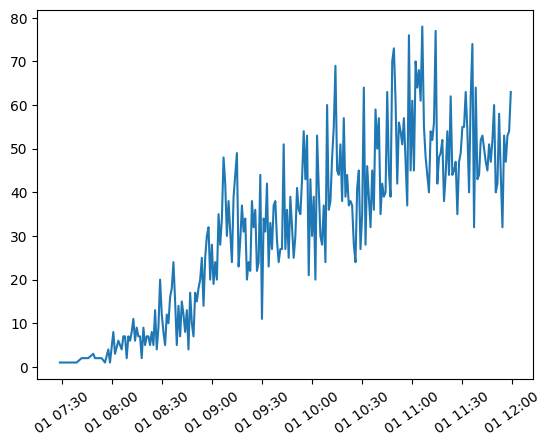

In [42]:
date_time_graph(morning_dataframe)

In [43]:
morning_data.head(10)

,Time,Purchases
0,07:30 - 08:00,23
1,08:00 - 08:30,209
2,08:30 - 09:00,464
3,09:00 - 09:30,932
4,09:30 - 10:00,1036
5,10:00 - 10:30,1208
6,10:30 - 11:00,1489
7,11:00 - 11:30,1567
8,11:30 - 12:00,1567


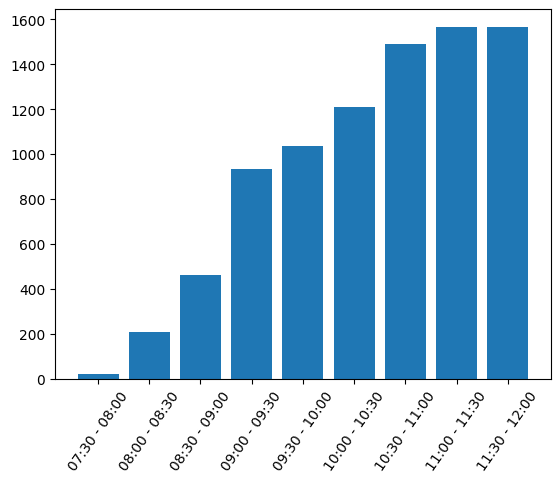

In [44]:
date_time_product_graph(morning_data)

#### Total Purchases Over Afternoon

In [45]:
afternoon_dataframe.head(10)

,Time,Purchases
0,2021-01-01 12:00:00,64
1,2021-01-01 12:01:00,34
2,2021-01-01 12:02:00,68
3,2021-01-01 12:03:00,50
4,2021-01-01 12:04:00,53
5,2021-01-01 12:05:00,60
6,2021-01-01 12:06:00,44
7,2021-01-01 12:07:00,73
8,2021-01-01 12:08:00,44
9,2021-01-01 12:09:00,25


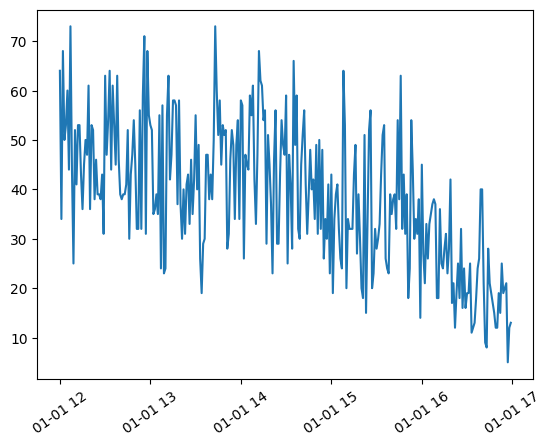

In [46]:
date_time_graph(afternoon_dataframe)

In [47]:
afternoon_data.head(11)

,Time,Purchases
0,12:00 - 12:30,1410
1,12:30 - 13:00,1433
2,13:00 - 13:30,1288
3,13:30 - 14:00,1334
4,14:00 - 14:30,1414
5,14:30 - 15:00,1211
6,15:00 - 15:30,1019
7,15:30 - 16:00,1098
8,16:00 - 16:30,779
9,16:30 - 17:00,519


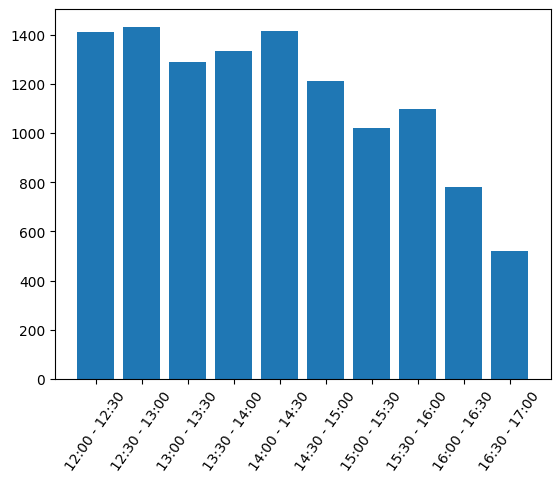

In [48]:
date_time_product_graph(afternoon_data)

### Insights

- In the morning, the movement is starts to get more intense around 08:00, so the preparatives for recieveing clients should be done before it to avoid problems, once there will have too many people at the shop.

- The majority of sales occur between 09:00 and 16:00. This is the interval where there has to be more attention to te public, meaning that should be more employeed, use of infraestructure and products available to facilitate the sale.

## Day Time Analysis for Product - Bread

### Code

#### From 06:00 to 07:00

In [49]:
time_product_bread_6 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_6_data = ps.sqldf(time_product_bread_6)

for numero_linha_2_2, texto_linha_2_2 in enumerate(time_product_bread_6_data['Time']):
  tempo_2_2 = time_product_bread_6_data['Time'].iloc[numero_linha_2_2]
  timestamp_2_2 = datetime.datetime.strptime(tempo_2_2, '%d-%m-%Y %H:%M')
  time_product_bread_6_data['Time'][numero_linha_2_2] = timestamp_2_2.strftime('2021-01-01 %H:%M')

bread_count_6 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_6_data
              where
                Time >= '2021-01-01 06:00:00' and Time < '2021-01-01 07:00:00'
              '''

bread_count_6_data_1 = ps.sqldf(bread_count_6)

time_data_bread_6 = ['06:00 - 07:00']

bread_count_6_data = pd.DataFrame({'Time': time_data_bread_6,
                                  'Purchases': bread_count_6_data_1['Purchases']})

bread_6_dataframe = bread_count_6_data

#### From 07:00 to 08:00

In [50]:
time_product_bread_7 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_7_data = ps.sqldf(time_product_bread_7)

for numero_linha_2_1, texto_linha_2_1 in enumerate(time_product_bread_7_data['Time']):
  tempo_2_1 = time_product_bread_7_data['Time'].iloc[numero_linha_2_1]
  timestamp_2_1 = datetime.datetime.strptime(tempo_2_1, '%d-%m-%Y %H:%M')
  time_product_bread_7_data['Time'][numero_linha_2_1] = timestamp_2_1.strftime('2021-01-01 %H:%M')

bread_count_7 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_7_data
              where
                Time >= '2021-01-01 07:00:00' and Time < '2021-01-01 08:00:00'
              '''

bread_count_7_data_1 = ps.sqldf(bread_count_7)

time_data_bread_7 = ['07:00 - 08:00']

bread_count_7_data = pd.DataFrame({'Time': time_data_bread_7,
                                  'Purchases': bread_count_7_data_1['Purchases']})

bread_7_dataframe = bread_count_7_data

#### From 08:00 to 09:00

In [51]:
time_product_bread_8 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_8_data = ps.sqldf(time_product_bread_8)

for numero_linha_2, texto_linha_2 in enumerate(time_product_bread_8_data['Time']):
  tempo_2 = time_product_bread_8_data['Time'].iloc[numero_linha_2]
  timestamp_2 = datetime.datetime.strptime(tempo_2, '%d-%m-%Y %H:%M')
  time_product_bread_8_data['Time'][numero_linha_2] = timestamp_2.strftime('2021-01-01 %H:%M')

bread_count_8 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_8_data
              where
                Time >= '2021-01-01 08:00:00' and Time < '2021-01-01 09:00:00'
              '''

bread_count_8_data_1 = ps.sqldf(bread_count_8)

time_data_bread_8 = ['08:00 - 09:00']

bread_count_8_data = pd.DataFrame({'Time': time_data_bread_8,
                                  'Purchases': bread_count_8_data_1['Purchases']})

bread_8_dataframe = bread_count_8_data

#### From 09:00 to 10:00

In [52]:
time_product_bread_9 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_9_data = ps.sqldf(time_product_bread_9)

for numero_linha_3, texto_linha_3 in enumerate(time_product_bread_9_data['Time']):
  tempo_3 = time_product_bread_9_data['Time'].iloc[numero_linha_3]
  timestamp_3 = datetime.datetime.strptime(tempo_3, '%d-%m-%Y %H:%M')
  time_product_bread_9_data['Time'][numero_linha_3] = timestamp_3.strftime('2021-01-01 %H:%M')

bread_count_9 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_9_data
              where
                Time >= '2021-01-01 09:00:00' and Time < '2021-01-01 10:00:00'
              '''

bread_count_9_data_1 = ps.sqldf(bread_count_9)

time_data_bread_9 = ['09:00 - 10:00']

bread_count_9_data = pd.DataFrame({'Time': time_data_bread_9,
                                  'Purchases': bread_count_9_data_1['Purchases']})

bread_9_dataframe = bread_count_9_data

#### From 10:00 to 11:00

In [53]:
time_product_bread_10 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_10_data = ps.sqldf(time_product_bread_10)

for numero_linha_4, texto_linha_4 in enumerate(time_product_bread_10_data['Time']):
  tempo_4 = time_product_bread_10_data['Time'].iloc[numero_linha_4]
  timestamp_4 = datetime.datetime.strptime(tempo_4, '%d-%m-%Y %H:%M')
  time_product_bread_10_data['Time'][numero_linha_4] = timestamp_4.strftime('2021-01-01 %H:%M')

bread_count_10 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_10_data
              where
                Time >= '2021-01-01 10:00:00' and Time < '2021-01-01 11:00:00'
              '''

bread_count_10_data_1 = ps.sqldf(bread_count_10)

time_data_bread_10 = ['10:00 - 11:00']

bread_count_10_data = pd.DataFrame({'Time': time_data_bread_10,
                                  'Purchases': bread_count_10_data_1['Purchases']})

bread_10_dataframe = bread_count_10_data

#### From 11:00 to 12:00

In [54]:
time_product_bread_11 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_11_data = ps.sqldf(time_product_bread_11)

for numero_linha_5, texto_linha_5 in enumerate(time_product_bread_11_data['Time']):
  tempo_5 = time_product_bread_11_data['Time'].iloc[numero_linha_5]
  timestamp_5 = datetime.datetime.strptime(tempo_5, '%d-%m-%Y %H:%M')
  time_product_bread_11_data['Time'][numero_linha_5] = timestamp_5.strftime('2021-01-01 %H:%M')

bread_count_11 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_11_data
              where
                Time >= '2021-01-01 11:00:00' and Time < '2021-01-01 12:00:00'
              '''

bread_count_11_data_1 = ps.sqldf(bread_count_11)

time_data_bread_11 = ['11:00 - 12:00']

bread_count_11_data = pd.DataFrame({'Time': time_data_bread_11,
                                  'Purchases': bread_count_11_data_1['Purchases']})

bread_11_dataframe = bread_count_11_data

#### From 12:00 to 13:00

In [55]:
time_product_bread_12 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_12_data = ps.sqldf(time_product_bread_12)

for numero_linha_6, texto_linha_6 in enumerate(time_product_bread_12_data['Time']):
  tempo_6 = time_product_bread_12_data['Time'].iloc[numero_linha_6]
  timestamp_6 = datetime.datetime.strptime(tempo_6, '%d-%m-%Y %H:%M')
  time_product_bread_12_data['Time'][numero_linha_6] = timestamp_6.strftime('2021-01-01 %H:%M')

bread_count_12 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_12_data
              where
                Time >= '2021-01-01 12:00:00' and Time < '2021-01-01 13:00:00'
              '''

bread_count_12_data_1 = ps.sqldf(bread_count_12)

time_data_bread_12 = ['12:00 - 13:00']

bread_count_12_data = pd.DataFrame({'Time': time_data_bread_12,
                                  'Purchases': bread_count_12_data_1['Purchases']})

bread_12_dataframe = bread_count_12_data

#### From 13:00 to 14:00

In [56]:
time_product_bread_13 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_13_data = ps.sqldf(time_product_bread_13)

for numero_linha_7, texto_linha_7 in enumerate(time_product_bread_13_data['Time']):
  tempo_7 = time_product_bread_13_data['Time'].iloc[numero_linha_7]
  timestamp_7 = datetime.datetime.strptime(tempo_7, '%d-%m-%Y %H:%M')
  time_product_bread_13_data['Time'][numero_linha_7] = timestamp_7.strftime('2021-01-01 %H:%M')

bread_count_13 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_13_data
              where
                Time >= '2021-01-01 13:00:00' and Time < '2021-01-01 14:00:00'
              '''

bread_count_13_data_1 = ps.sqldf(bread_count_13)

time_data_bread_13 = ['13:00 - 14:00']

bread_count_13_data = pd.DataFrame({'Time': time_data_bread_13,
                                  'Purchases': bread_count_13_data_1['Purchases']})

bread_13_dataframe = bread_count_13_data

#### From 14:00 to 15:00

In [57]:
time_product_bread_14 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_14_data = ps.sqldf(time_product_bread_14)

for numero_linha_8, texto_linha_8 in enumerate(time_product_bread_14_data['Time']):
  tempo_8 = time_product_bread_14_data['Time'].iloc[numero_linha_8]
  timestamp_8 = datetime.datetime.strptime(tempo_8, '%d-%m-%Y %H:%M')
  time_product_bread_14_data['Time'][numero_linha_8] = timestamp_8.strftime('2021-01-01 %H:%M')

bread_count_14 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_14_data
              where
                Time >= '2021-01-01 14:00:00' and Time < '2021-01-01 15:00:00'
              '''

bread_count_14_data_1 = ps.sqldf(bread_count_14)

time_data_bread_14 = ['14:00 - 15:00']

bread_count_14_data = pd.DataFrame({'Time': time_data_bread_14,
                                  'Purchases': bread_count_14_data_1['Purchases']})

bread_14_dataframe = bread_count_14_data

#### From 15:00 to 16:00

In [58]:
time_product_bread_15 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_15_data = ps.sqldf(time_product_bread_15)

for numero_linha_9, texto_linha_9 in enumerate(time_product_bread_15_data['Time']):
  tempo_9 = time_product_bread_15_data['Time'].iloc[numero_linha_9]
  timestamp_9 = datetime.datetime.strptime(tempo_9, '%d-%m-%Y %H:%M')
  time_product_bread_15_data['Time'][numero_linha_9] = timestamp_9.strftime('2021-01-01 %H:%M')

bread_count_15 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_15_data
              where
                Time >= '2021-01-01 15:00:00' and Time < '2021-01-01 16:00:00'
              '''

bread_count_15_data_1 = ps.sqldf(bread_count_15)

time_data_bread_15 = ['15:00 - 16:00']

bread_count_15_data = pd.DataFrame({'Time': time_data_bread_15,
                                  'Purchases': bread_count_15_data_1['Purchases']})

bread_15_dataframe = bread_count_15_data

#### From 16:00 to 17:00

In [59]:
time_product_bread_16 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_16_data = ps.sqldf(time_product_bread_16)

for numero_linha_10, texto_linha_10 in enumerate(time_product_bread_16_data['Time']):
  tempo_10 = time_product_bread_16_data['Time'].iloc[numero_linha_10]
  timestamp_10 = datetime.datetime.strptime(tempo_10, '%d-%m-%Y %H:%M')
  time_product_bread_16_data['Time'][numero_linha_10] = timestamp_10.strftime('2021-01-01 %H:%M')

bread_count_16 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_16_data
              where
                Time >= '2021-01-01 16:00:00' and Time <= '2021-01-01 17:00:00'
              '''

bread_count_16_data_1 = ps.sqldf(bread_count_16)

time_data_bread_16 = ['16:00 - 17:00']

bread_count_16_data = pd.DataFrame({'Time': time_data_bread_16,
                                  'Purchases': bread_count_16_data_1['Purchases']})

bread_16_dataframe = bread_count_16_data

#### From 17:00 to 18:00

In [60]:
time_product_bread_17 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_17_data = ps.sqldf(time_product_bread_17)

for numero_linha_11, texto_linha_11 in enumerate(time_product_bread_17_data['Time']):
  tempo_11 = time_product_bread_17_data['Time'].iloc[numero_linha_11]
  timestamp_11 = datetime.datetime.strptime(tempo_11, '%d-%m-%Y %H:%M')
  time_product_bread_17_data['Time'][numero_linha_11] = timestamp_11.strftime('2021-01-01 %H:%M')

bread_count_17 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_17_data
              where
                Time >= '2021-01-01 17:00:00' and Time <= '2021-01-01 18:00:00'
              '''

bread_count_17_data_1 = ps.sqldf(bread_count_17)

time_data_bread_17 = ['17:00 - 18:00']

bread_count_17_data = pd.DataFrame({'Time': time_data_bread_17,
                                  'Purchases': bread_count_17_data_1['Purchases']})

bread_17_dataframe = bread_count_17_data

#### From 18:00 to 19:00

In [61]:
time_product_bread_18 = '''select date_time as Time, period_day as 'Day Period'
              from
                data
              where
                Item = 'Bread'
              '''

time_product_bread_18_data = ps.sqldf(time_product_bread_18)

for numero_linha_12, texto_linha_12 in enumerate(time_product_bread_18_data['Time']):
  tempo_12 = time_product_bread_18_data['Time'].iloc[numero_linha_12]
  timestamp_12 = datetime.datetime.strptime(tempo_12, '%d-%m-%Y %H:%M')
  time_product_bread_18_data['Time'][numero_linha_12] = timestamp_12.strftime('2021-01-01 %H:%M')

bread_count_18 = '''select Time, count(Time) as Purchases
              from
                time_product_bread_18_data
              where
                Time >= '2021-01-01 18:00:00' and Time <= '2021-01-01 19:00:00'
              '''

bread_count_18_data_1 = ps.sqldf(bread_count_18)

time_data_bread_18 = ['18:00 - 19:00']

bread_count_18_data = pd.DataFrame({'Time': time_data_bread_18,
                                  'Purchases': bread_count_18_data_1['Purchases']})

bread_18_dataframe = bread_count_18_data

#### Total Data

In [62]:
bread_data = pd.DataFrame({'Time': [bread_6_dataframe.iloc[0][0],
                                    bread_7_dataframe.iloc[0][0],
                                    bread_8_dataframe.iloc[0][0],
                                    bread_9_dataframe.iloc[0][0],
                                    bread_10_dataframe.iloc[0][0],
                                    bread_11_dataframe.iloc[0][0],
                                    bread_12_dataframe.iloc[0][0],
                                    bread_13_dataframe.iloc[0][0],
                                    bread_14_dataframe.iloc[0][0],
                                    bread_15_dataframe.iloc[0][0],
                                    bread_16_dataframe.iloc[0][0],
                                    bread_17_dataframe.iloc[0][0],
                                    bread_18_dataframe.iloc[0][0]],
                           'Purchases': [bread_6_dataframe.iloc[0][1],
                                         bread_7_dataframe.iloc[0][1],
                                         bread_8_dataframe.iloc[0][1],
                                         bread_9_dataframe.iloc[0][1],
                                         bread_10_dataframe.iloc[0][1],
                                         bread_11_dataframe.iloc[0][1],
                                         bread_12_dataframe.iloc[0][1],
                                         bread_13_dataframe.iloc[0][1],
                                         bread_14_dataframe.iloc[0][1],
                                         bread_15_dataframe.iloc[0][1],
                                         bread_16_dataframe.iloc[0][1],
                                         bread_17_dataframe.iloc[0][1],
                                         bread_18_dataframe.iloc[0][1]]})

### Graph and Data

In [66]:
bread_data.head(13)

,Time,Purchases
0,06:00 - 07:00,0
1,07:00 - 08:00,2
2,08:00 - 09:00,176
3,09:00 - 10:00,401
4,10:00 - 11:00,518
5,11:00 - 12:00,523
6,12:00 - 13:00,473
7,13:00 - 14:00,342
8,14:00 - 15:00,334
9,15:00 - 16:00,309


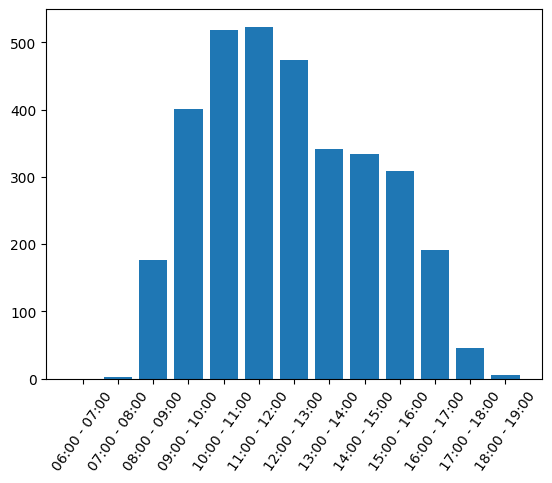

In [64]:
date_time_product_graph(bread_data)

### Insights

- One interesting approach is to analise each products by its salles over time. In this case, we are analising the Sales over time of  Bread. In this approach there's some specific insights that can be retrieved.

- For the Bread, the most sales occur between 08:00 and 16:00. So, by this time there should always be Bread available for sales.

- Since Bread is usualy better when consumed fresh, while it still warm and soft, this is the period where should have a Bread production line working with high intensity, so that breads can continously being served when they just got right out of the oven.

- On the other hand, analysing the rest of the time out the most sales gap, Bread is not sold that much. So it could be an alternative to save some currency by realocating employees out of the Bread production line.